# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
%matplotlib inline
digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

載入 相關套件 並 執行 PCA 實驗 ...

In [8]:
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

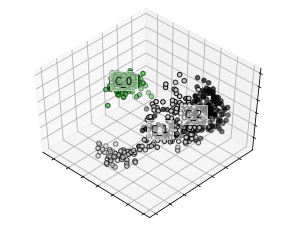

In [9]:
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('C_0', 0), ('C_1', 1), ('C_2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

### 用PCA來解決半月形2D資料

In [10]:
# 從Day58的作業來的code
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

# 設定 2D 樣板資料
n_samples = 200
random_state = 100

# 生成 雙半月 資料點
noisy_moons, y = datasets.make_moons(n_samples=n_samples, noise=.05, random_state=random_state)

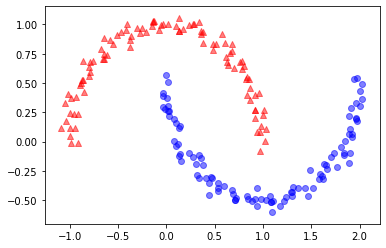

In [11]:
plt.scatter(noisy_moons[y==0, 0], noisy_moons[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(noisy_moons[y==1, 0], noisy_moons[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

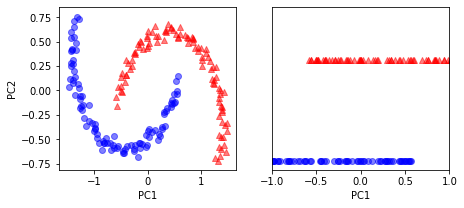

In [13]:
scikit_pca = decomposition.PCA(n_components=2)
X_spca = scikit_pca.fit_transform(noisy_moons)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color = 'red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color = 'blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((100,1))+0.02, color = 'red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((100,1))-0.02, color = 'blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()